In [30]:
# import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.svm import svc


ImportError: cannot import name 'svc' from 'sklearn.svm' (C:\Users\Mehsam.Hemani\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\__init__.py)

In [5]:
"""Attributes:

Dataset information:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

"""

'Attributes:\n\nDataset information:\n\nThis dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.\nSeveral constraints were placed on the selection of these instances from a larger database. \nIn particular, all patients here are females at least 21 years old of Pima Indian heritage.\n\n\nPregnancies: Number of times pregnant\n\nGlucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test\n\nBloodPressure: Diastolic blood pressure (mm Hg)\n\nSkinThickness: Triceps skin fold thickness (mm)\n\nInsulin: 2-Hour serum insulin (mu U/ml)\n\nBMI: Body mass index (weight in kg/(height in m)^2)\n\nDiabetesPedigreeFunction: Diabetes pedigree function\n\nAge: Age (years)\n\nOutcome: Class variable (0 or 1)\n\n'

In [2]:
diabetesDF = pd.read_csv('E:/diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [52]:
corr = diabetesDF[diabetesDF.columns.difference(['Outcome'], sort=False)].corr()
corr.round(2)\
    .style\
        .background_gradient(cmap='Greens')\
        .highlight_min(color='red')\
        .set_properties(**{'text-align': 'center'})

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54
Glucose,0.13,1,0.15,0.06,0.33,0.22,0.14,0.26
BloodPressure,0.14,0.15,1,0.21,0.09,0.28,0.04,0.24
SkinThickness,-0.08,0.06,0.21,1,0.44,0.39,0.18,-0.11
Insulin,-0.07,0.33,0.09,0.44,1,0.2,0.19,-0.04
BMI,0.02,0.22,0.28,0.39,0.2,1,0.14,0.04
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1,0.03
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1


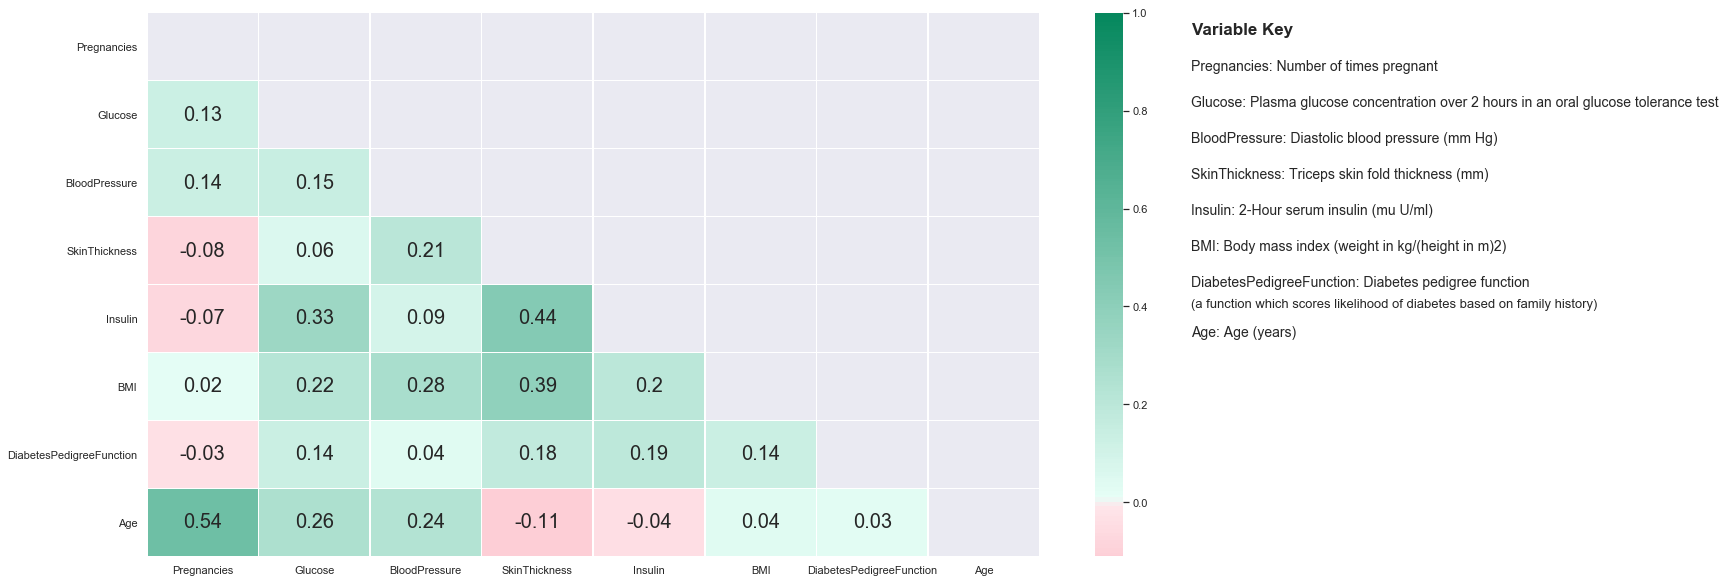

In [17]:
diabetesDF = pd.read_csv('E:/diabetes.csv')

corr = diabetesDF[diabetesDF.columns.difference(['Outcome'], sort=False)].corr().round(2)

# CUSTOMIZATION OF STYLING
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
color=sns.diverging_palette(10, 150,s=99, l=50, sep=1,as_cmap=True)
sns.heatmap(corr,
        center=0,
        mask=mask, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=color,
        annot=True,
        annot_kws={"fontsize":20},
        linewidths=.5,
        ax=ax)

# CUSTOM KEY FOR QUICK UNDERSTANDING
plt.gcf().text(0.85, 0.85, "Variable Key", fontsize=17,weight='bold')
plt.gcf().text(0.85, 0.80, "Pregnancies: Number of times pregnant", fontsize=14)
plt.gcf().text(0.85, 0.75, "Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test", fontsize=14)
plt.gcf().text(0.85, 0.70, "BloodPressure: Diastolic blood pressure (mm Hg)", fontsize=14)
plt.gcf().text(0.85, 0.65, "SkinThickness: Triceps skin fold thickness (mm)", fontsize=14)
plt.gcf().text(0.85, 0.60, "Insulin: 2-Hour serum insulin (mu U/ml)", fontsize=14)
plt.gcf().text(0.85, 0.55, "BMI: Body mass index (weight in kg/(height in m)2)", fontsize=14)
plt.gcf().text(0.85, 0.50, "DiabetesPedigreeFunction: Diabetes pedigree function", fontsize=14)
plt.gcf().text(0.85, 0.47, "(a function which scores likelihood of diabetes based on family history)", fontsize=13)
plt.gcf().text(0.85, 0.43, "Age: Age (years)", fontsize=14)

plt.show()

In [3]:
#Total 768 patients record
#Using 650 data for training
# Using 100 data for testing
#Using 18 data for checking

dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

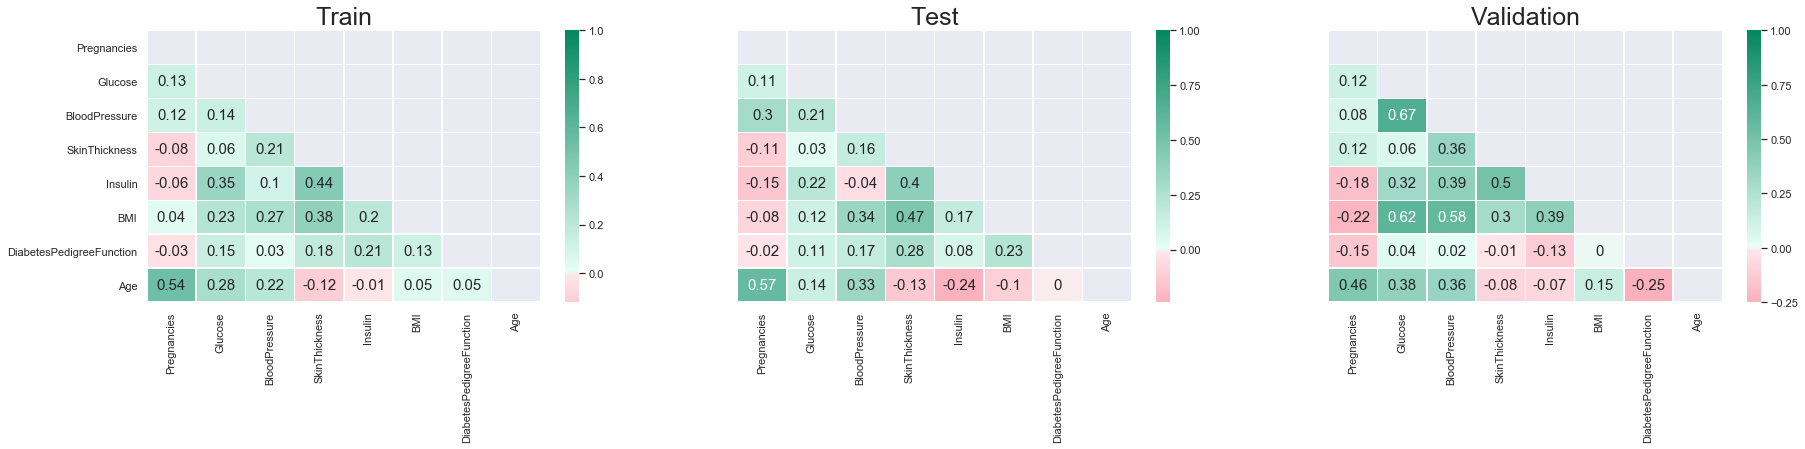

In [20]:
corr_Train = diabetesDF[diabetesDF.columns.difference(['Outcome'], sort=False)][:650].corr().round(2)
corr_Test = diabetesDF[diabetesDF.columns.difference(['Outcome'], sort=False)][650:750].corr().round(2)
corr_Check = diabetesDF[diabetesDF.columns.difference(['Outcome'], sort=False)][750:].corr().round(2)

# CUSTOMIZATION OF STYLING
fig, ax = plt.subplots(1,3,figsize=(30,5),sharex=True,sharey=True)
sns.set(font_scale=1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
color=sns.diverging_palette(10, 150,s=99, l=50, sep=1,as_cmap=True)

ax[0].set_title('Train', fontsize=25)
sns.heatmap(corr_Train,
        center=0,
        mask=mask, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=color,
        annot=True,
        annot_kws={"fontsize":15},
        linewidths=.5,
        ax=ax[0])

ax[1].set_title('Test', fontsize=25)
sns.heatmap(corr_Test,
        center=0,
        mask=mask, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=color,
        annot=True,
        annot_kws={"fontsize":15},
        linewidths=.5,
        ax=ax[1])

ax[2].set_title('Validation', fontsize=25)
sns.heatmap(corr_Check,
#         ax,
        center=0,
        mask=mask, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=color,
        annot=True,
        annot_kws={"fontsize":15},
        linewidths=.5,
        ax=ax[2])

In [53]:
corr_Train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [4]:
#Separating label and features and converting to numpy array to feed into our model
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))


In [5]:
# Normalize the data 
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

# means = np.mean(trainData, axis=0)
# stds = np.std(trainData, axis=0)

In [27]:
#Now , we will use the our training data to 
#create a bayesian classifier.

diabetesCheck = svm
diabetesCheck.fit(trainData, trainLabel)

#After we train our bayesian classifier , 
#we test how well it works using our test data.
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

AttributeError: module 'sklearn.svm' has no attribute 'fit'

In [32]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData,trainLabel)
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  78.0 %


C:\Users\Mehsam.Hemani\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
coeff = list(diabetesCheck.coef_[0])
coeff

[0.44287472197602273,
 1.0527740518051887,
 -0.24221676495456732,
 -0.0062885138719462426,
 -0.10299836235634575,
 0.7621389801499577,
 0.34898508475085926,
 0.12222510487561296]

In [14]:
labels = list(dfTrain.drop('Outcome',1).columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Text(0.5, 0, 'Importance')

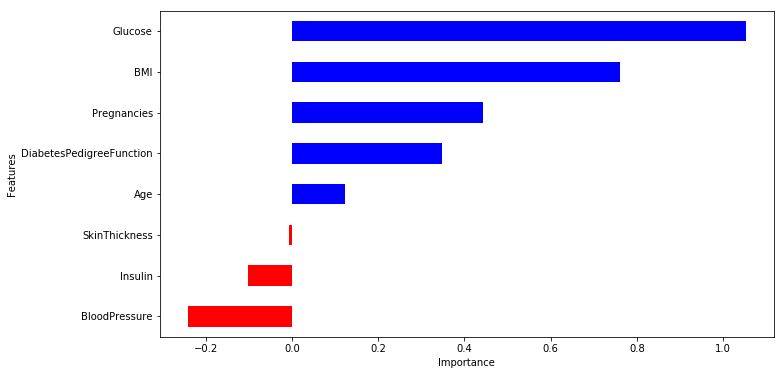

In [15]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [51]:
#model saving and loading
joblib.dump(diabetesCheck, 'e:\diabeteseModel.pkl')
diabetesLoadedModel = joblib.load('e:\diabeteseModel.pkl')

In [52]:
#testing loaded model to make prediction
accuracyModel = diabetesLoadedModel.score(testData,testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


In [47]:
dfCheck.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


In [48]:
sampleData = dfCheck[:1]
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures

array([[  4.   , 136.   ,  70.   ,   0.   ,   0.   ,  31.2  ,   1.182,
         22.   ]])

In [49]:
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
predictionProbab = diabetesLoadedModel.predict_proba(sampleDataFeatures)

In [50]:
prediction

array([1], dtype=int64)